In [1]:
import numpy as np 
import os
import glob
import re
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from skimage.transform import resize, rescale

In [2]:
path = "./MultiModHandGestRecog/near-infrared/"

train_data = []
train_labels = []

userList = glob.glob("./MultiModHandGestRecog/near-infrared/*")
for user in userList:
    userTrainPath = user+"/train_pose/*"
    trainList = glob.glob(userTrainPath)
    for gesture in trainList:
        imagesPath = gesture+"/*.png"
        imagesList = glob.glob(imagesPath)
        for image in imagesList:
            pngFile = mpimg.imread(image)
            #rescImage = rescale(pngFile,0.5)
            resImage = resize(pngFile,(60,100))
            train_data.append(resImage)
            label = gesture.split("/")[-1]
            train_labels.append(label)
    print("user : " + user + " done")


user : ./MultiModHandGestRecog/near-infrared\user_01 done
user : ./MultiModHandGestRecog/near-infrared\user_02 done
user : ./MultiModHandGestRecog/near-infrared\user_03 done
user : ./MultiModHandGestRecog/near-infrared\user_04 done
user : ./MultiModHandGestRecog/near-infrared\user_05 done
user : ./MultiModHandGestRecog/near-infrared\user_06 done
user : ./MultiModHandGestRecog/near-infrared\user_07 done
user : ./MultiModHandGestRecog/near-infrared\user_08 done
user : ./MultiModHandGestRecog/near-infrared\user_09 done
user : ./MultiModHandGestRecog/near-infrared\user_10 done
user : ./MultiModHandGestRecog/near-infrared\user_11 done
user : ./MultiModHandGestRecog/near-infrared\user_12 done
user : ./MultiModHandGestRecog/near-infrared\user_13 done
user : ./MultiModHandGestRecog/near-infrared\user_14 done
user : ./MultiModHandGestRecog/near-infrared\user_15 done
user : ./MultiModHandGestRecog/near-infrared\user_16 done
user : ./MultiModHandGestRecog/near-infrared\user_17 done
user : ./Multi

In [3]:
test_data = []
test_labels = []

for user in userList:
    userTrainPath = user+"/test_pose/*"
    trainList = glob.glob(userTrainPath)
    for gesture in trainList:
        imagesPath = gesture+"/*.png"
        imagesList = glob.glob(imagesPath)
        for image in imagesList:
            pngFile = mpimg.imread(image)
            #rescImage = rescale(pngFile,0.5)
            resImage = resize(pngFile,(60,100))
            test_data.append(resImage)
            label = gesture.split("/")[-1]
            test_labels.append(label)
    print("user : " + user + " done")

user : ./MultiModHandGestRecog/near-infrared\user_01 done
user : ./MultiModHandGestRecog/near-infrared\user_02 done
user : ./MultiModHandGestRecog/near-infrared\user_03 done
user : ./MultiModHandGestRecog/near-infrared\user_04 done
user : ./MultiModHandGestRecog/near-infrared\user_05 done
user : ./MultiModHandGestRecog/near-infrared\user_06 done
user : ./MultiModHandGestRecog/near-infrared\user_07 done
user : ./MultiModHandGestRecog/near-infrared\user_08 done
user : ./MultiModHandGestRecog/near-infrared\user_09 done
user : ./MultiModHandGestRecog/near-infrared\user_10 done
user : ./MultiModHandGestRecog/near-infrared\user_11 done
user : ./MultiModHandGestRecog/near-infrared\user_12 done
user : ./MultiModHandGestRecog/near-infrared\user_13 done
user : ./MultiModHandGestRecog/near-infrared\user_14 done
user : ./MultiModHandGestRecog/near-infrared\user_15 done
user : ./MultiModHandGestRecog/near-infrared\user_16 done
user : ./MultiModHandGestRecog/near-infrared\user_17 done
user : ./Multi

In [4]:
X = np.array(train_data)
Y = np.array(train_labels)
for i in range(len(Y)):
    tmp = Y[i].split("\\")
    Y[i] = tmp[1]

def to_categorical(labels):
    label_set = list(set(labels))
    print(label_set)
    categorical_labels = []
    for label in labels:
        tmp = np.zeros(len(label_set))
        for i in label_set:
            if label == i:
                tmp[label_set.index(i)] = 1
        categorical_labels.append(tmp)
    return categorical_labels
    
Y_cat = np.array(to_categorical(Y))

np.save("data.npy",X)
np.save("labels.npy",Y)
np.save("labels_cat.npy",Y_cat)

['hang', 'five', 'up', 'down', 'ok', 'two', 'four', 'fist_moved', 'C', 'palm_m', 'palm_u', 'three', 'palm', 'heavy', 'L', 'index']


In [12]:
X_test = np.array(test_data)
Y_test = np.array(test_labels)
for i in range(len(Y_test)):
    tmp = Y_test[i].split("\\")
    Y_test[i] = tmp[1]
    
Y_test_cat = np.array(to_categorical(Y_test))

np.save("test.npy",X_test)
np.save("testlabels.npy",Y_test)
np.save("testlabels_cat.npy",Y_test_cat)

['hang', 'five', 'up', 'down', 'ok', 'two', 'four', 'fist_moved', 'C', 'palm_m', 'palm_u', 'three', 'palm', 'heavy', 'L', 'index']


In [4]:
#### ONLY EXECUTE TO LOAD ####
X = np.load("data.npy",allow_pickle=True)
Y = np.load("labels.npy",allow_pickle=True)
Y_cat = np.load("labels_cat.npy",allow_pickle=True)

X_test = np.load("test.npy",allow_pickle=True)
Y_test = np.load("testlabels.npy",allow_pickle=True)
Y_test_cat = np.load("testlabels_cat.npy",allow_pickle=True)

[[0.01791913 0.01795591 0.01883704 ... 0.01320919 0.01296333 0.01330869]
 [0.01837698 0.01837972 0.01697698 ... 0.01158498 0.01380813 0.01559023]
 [0.01760917 0.01845406 0.01759543 ... 0.01385505 0.01511466 0.01449488]
 ...
 [0.01708756 0.0170807  0.01713569 ... 0.01189192 0.0124523  0.01167243]
 [0.01589336 0.01772662 0.01899582 ... 0.01508095 0.01336739 0.01197893]
 [0.01619987 0.01783849 0.01839722 ... 0.01462933 0.0137291  0.01290892]]
C
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
64457 64457


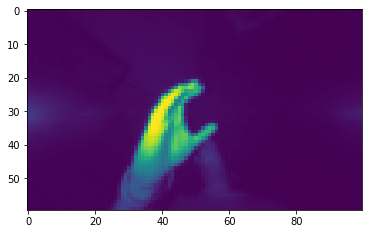

In [13]:
print(X[0])
fig = plt.imshow(X[0])
print(Y[0])
print(Y_cat[0])
print(len(X),len(Y_cat))

In [14]:
from keras import Sequential
from keras.layers import MaxPooling2D, Flatten, Dropout, Conv2D
from keras.layers import LeakyReLU
from keras.layers.core import Dense, Activation
import keras.layers
from keras import optimizers
from keras import initializers


In [15]:
newShape = (X.shape[0],X.shape[1],X.shape[2],1)
newShape_test = (X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(np.shape(Y_cat[0]))
print(X.shape)
X_r= X.reshape(newShape)
print(X_r.shape)
X_test = X_test.reshape(newShape_test)

(16,)
(64457, 60, 100)
(64457, 60, 100, 1)


In [22]:
input_shape = X_r[0].shape
output_shape = Y_cat.shape[-1]
normal_init = initializers.RandomNormal(stddev=0.2)
normal_init_2 = initializers.RandomNormal(stddev=0.5)


model = Sequential()
model.add(Conv2D(64,(3,3),activation = "swish", input_shape=input_shape, padding='same'))
model.add(Conv2D(32,(6,6), activation="swish", input_shape=input_shape, padding='same'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(output_shape,activation="softmax"))

model.compile(optimizer=optimizers.Adam(learning_rate=0.00025,amsgrad=True),loss='categorical_crossentropy', metrics=['accuracy'])



In [23]:
print(len(X_r),len(Y_cat))
Y_cat = np.array(Y_cat)

64457 64457


In [24]:
history = model.fit(X_r, Y_cat,epochs=1,validation_data=(X_test,Y_test_cat))
history = model.fit(X_r, Y_cat,epochs=5,batch_size=50,validation_data=(X_test,Y_test_cat))

2015/2015 [==============================] - 101s 50ms/step - loss: 1.1437 - accuracy: 0.6451 - val_loss: 1.1598 - val_accuracy: 0.6709
Epoch 1/5
1290/1290 [==============================] - 87s 67ms/step - loss: 0.4491 - accuracy: 0.8623 - val_loss: 1.0327 - val_accuracy: 0.7490
Epoch 2/5
1290/1290 [==============================] - 86s 67ms/step - loss: 0.2955 - accuracy: 0.9079 - val_loss: 1.0371 - val_accuracy: 0.7767
Epoch 3/5
1290/1290 [==============================] - 86s 67ms/step - loss: 0.2044 - accuracy: 0.9354 - val_loss: 1.2185 - val_accuracy: 0.7767
Epoch 4/5
1290/1290 [==============================] - 86s 67ms/step - loss: 0.1433 - accuracy: 0.9548 - val_loss: 1.2145 - val_accuracy: 0.7913
Epoch 5/5
1290/1290 [==============================] - 88s 68ms/step - loss: 0.1076 - accuracy: 0.9662 - val_loss: 1.2580 - val_accuracy: 0.7999
